# <font color='green'>Tratando os dados do Spotify</font>

### Instalando as bibliotecas:

**Matplotlib, Numpy, Pandas, Seaborn e Wordcloud.
Serão utilizados também os módulos OS, json e glob.**

In [193]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [194]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [195]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [196]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [197]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [198]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import os

sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()

In [199]:
# Lista de dados disponíveis 
os.listdir('dados/spotify_1/')

['Follow.json',
 'SearchQueries.json',
 'Userdata.json',
 'YourLibrary.json',
 'Identity.json',
 'Read_Me_First.pdf',
 'Inferences.json',
 'Playlist1.json',
 'StreamingHistory0.json']

## <font color='green'>Compreendendo os dados de cada arquivo da base</font>

<font color='green'>__Follow.json:__</font>
```
    Isso inclui (quando disponível) no momento da solicitação:    
    O número de seguidores que a conta possui.      
    O número de outras contas que esta conta segue.        
    O número de outras contas que esta conta está bloqueando.
```
               
<font color='green'>__Payments.json__</font>
```
    Isso inclui detalhes do método de pagamento (quando disponível):
    Tipo - O tipo de cartão, por exemplo, Mastercard, Visa, etc., ou outra forma de pagamento, como     
    Vale-presente, PayPal.
    Número do cartão - quando a forma de pagamento for cartão, são apenas os quatro últimos dígitos.
    Expiração do cartão - quando o método de pagamento é por cartão, esta é a data de validade de quatro    
    dígitos (por exemplo, 18/07).
    Data de criação - A data em que os detalhes do pagamento foram fornecidos ao Spotify.
    País de pagamento - o país onde o cartão foi emitido, por exemplo, Reino Unido, Suécia.
    Código postal - o código postal no qual o cartão está registrado.
```
    
<font color='green'>__SearchQueries.json__</font>
```
    Uma lista de pesquisas feitas, incluindo:
    A data e a hora em que a pesquisa foi feita.
    Tipo de dispositivo / plataforma usado (como iOS, desktop).
    A consulta de pesquisa mostra o que o usuário digitou no campo de pesquisa.
    Os URIs de interação da pesquisa mostram a lista de Uniform Resource Identifiers (URI) dos resultados     
    da pesquisa com os quais o usuário interagiu.   
    Para comandos feitos por voz, consulte Entrada de voz abaixo.
```

<font color='green'>__Userdata.json__</font>
```
    Isso inclui (quando disponível):
    Nome de usuário do Spotify.
    Endereço de e-mail.
    País.
    Criado a partir do Facebook - Isso é verdadeiro se a conta foi criada através do Facebook.
    ID de usuário do Facebook - Isso é incluído se o usuário ativou o processamento de dados do Facebook e     
    vinculou sua conta do Spotify ao entrar usando o login do Facebook ou criou sua conta do Spotify     
    através do Facebook.
    Local preferido.
    Data de nascimento.
    Gênero.
    Código postal.
    Endereço postal.
    Número de celular.
    Operador móvel.
    Marca móvel.
    Criação da conta - Esta é a data de registro do usuário. 
```    
    
<font color='green'>__YourLibrary.json__</font>
```
    Um resumo (no ponto da data da solicitação) do conteúdo salvo em sua biblioteca (músicas, episódios,    
    programas, artistas e álbuns), incluindo:
    Nomes de entidades.
    Nomes de álbuns e shows.
    Criadores.
    Identificadores Uniformes de Recursos do Item (URIs). 
```

<font color='green'>__Identity.json__</font>
```
    Dados do usuário como nome da conta, primeiro e segundo nome, imagem do perfil e se o perfil é    
    verificado.
```

<font color='green'>__Inferences.json__</font>
```
    Tiramos certas inferências sobre seus interesses e preferências com base em seu uso do serviço Spotify    
    e usando dados obtidos de nossos anunciantes e outros parceiros de publicidade.    
    Isso inclui uma lista de segmentos de mercado aos quais você está atualmente associado.    
    Dependendo de suas configurações, esses dados podem ser usados para veicular publicidade com base em     
    interesses para você dentro do serviço Spotify.    
```

<font color='green'>__Playlist1.json__</font>
```
    Um resumo das listas de reprodução criadas ou salvas e todas as músicas salvas, incluindo:
    Nome da lista de reprodução.
    Data em que a lista de reprodução foi modificada pela última vez.
    Nomes das músicas contidas na lista de reprodução.
    Nomes de artistas para cada música.
    Nomes de álbuns ou episódios (se podcasts).
    Nome da faixa local, se o usuário carregou áudio salvo localmente para ser reproduzido no serviço     
    Spotify.
    Quaisquer descrições adicionadas pelo usuário à lista de reprodução.
    O número de seguidores da lista de reprodução. 
```

<font color='green'>__StreamingHistory0.json__</font>
```
    Uma lista de itens (por exemplo, músicas, vídeos e podcasts) ouvidos ou assistidos no ano anterior,     
    incluindo:
    Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).
    Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).
    Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).
    “MsPlayed” - Significa quantos milissegundos a faixa foi ouvida. 
```

## <font color='green'>Importando os dados</font>

In [200]:
# 01 - Histórico das músicas ouvidas
df_history = pd.read_json('dados/spotify_1/StreamingHistory0.json')

In [201]:
df_history.head(5)

,endTime,artistName,trackName,msPlayed
0,2020-12-21 21:16,Ferrugem,Pra você acreditar - Ao vivo,203894
1,2020-12-21 21:19,Turma do Pagode,Aonde Quer Chegar (feat. Gaab),191641
2,2020-12-21 21:24,Dilsinho,Controle Remoto (Ao Vivo),237030
3,2020-12-21 21:30,Ferrugem,Sinto sua falta - Ao vivo,204662
4,2020-12-21 21:30,Turma do Pagode,Deixa em Off - Ao Vivo,15239


In [202]:
# Verificando o tamanho do dataset
df_history.shape[0]

486

In [203]:
# 02 - Músicas curtidas
with open('./dados/spotify_1/YourLibrary.json') as f:
    df_tracks = pd.DataFrame(json.load(f)['tracks'])
    
df_tracks.head()

,artist,album,track,uri
0,Bryce Janey,Blues In My Soul,Funky Guitar Blues,spotify:track:2dqkDzJPwSIduZlKJh0lvB
1,Travis Scott,ASTROWORLD,STOP TRYING TO BE GOD,spotify:track:1xYpVRspgaLxdJLOTQkTjg
2,UCLÃ,Nas Alturas,Nas Alturas,spotify:track:5bgLqAfunEaExdIzaZVh2t
3,Distúrbio Verbal,Direto do Manicômio,"Interno 860, Pt. 2",spotify:track:7ccXZkBhp5qOzzpkv4uUPw
4,MMoneis,Tempo Novo,Bom Dia,spotify:track:7AwXHfHjBBfZRsGcRhEXcd


In [204]:
# Verificando o tamanho do dataset
df_tracks.shape[0]

1345

In [205]:
# 03 - Artistas curtidos
with open('./dados/spotify_1/YourLibrary.json') as f:
    df_artists = pd.DataFrame(json.load(f)['artists'])
    
df_artists.head(5)

,name,uri
0,1Kilo,spotify:artist:6E2st8OqIaS7PU5gj95FSE
1,1LUM3,spotify:artist:01JSyuJJh1WCHIuM3Zx7hn
2,2Pac,spotify:artist:1ZwdS5xdxEREPySFridCfh
3,3 Na Massa,spotify:artist:1swmzlKgFluITKhxSV9ixX
4,3030,spotify:artist:3OHpci0ruhvaMv9F795LR5


In [206]:
# Verificando o tamanho do dataset
df_artists.shape[0]

413

In [207]:
# 04 - Albuns curtidos
with open('./dados/spotify_1/YourLibrary.json') as f:
    df_albums = pd.DataFrame(json.load(f)['albums'])
    
df_albums.head(5)

,artist,album,uri
0,Travis Scott,ASTROWORLD,spotify:album:41GuZcammIkupMPKH2OJ6I
1,Caetano Veloso,Multishow Ao Vivo Caetano e Maria Gadú,spotify:album:4MbNm26ee65EJm8BKvftWH
2,Rap Box,Cordel Marginal,spotify:album:71z1vtkkL7sYJCeRH76N2y
3,Nick Murphy,Run Fast Sleep Naked,spotify:album:0oEjSlmdbU0lYshmk1W37v
4,Cartola,Cartola,spotify:album:1I9bhj5qpHvIBIPWXZUXAt


In [281]:
# Excluindo colunas que não vou utilizar
df_albums.drop(columns=['uri'], inplace=True)

In [282]:
df_albums.head()

,artist,album
0,Travis Scott,ASTROWORLD
1,Caetano Veloso,Multishow Ao Vivo Caetano e Maria Gadú
2,Rap Box,Cordel Marginal
3,Nick Murphy,Run Fast Sleep Naked
4,Cartola,Cartola


In [283]:
# Verificando o tamanho do dataset
df_albums.shape[0]

179

In [209]:
# 05 - Pesquisas realizadas
df_search = pd.read_json('dados/spotify_1/SearchQueries.json')
df_search.head(5)

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-08T14:33:01.743Z[UTC],melhores rap roma,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
1,ANDROID,2021-05-15T17:24:25.462Z[UTC],rael,[spotify:artist:0GWNKI3VPEcJsOIEhUjmxd]
2,ANDROID,2021-05-19T05:22:17.678Z[UTC],vit,[spotify:artist:06lnOkY99sXVW44Y0M4BDP]
3,ANDROID,2021-05-26T15:56:55.150Z[UTC],quando o gra,[]
4,ANDROID,2021-05-31T20:56:32.255Z[UTC],rap 2020,[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8]


In [210]:
# Verificando o tamanho do dataset
df_search.shape[0]

42

## <font color='green'>Relembrando os detalhes do arquivo Streaming History:</font>

Variáveis:

__endTime:__ Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).    
__artistName:__ Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).   
__trackName:__ Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).   
__msPlayed:__ Significa quantos milissegundos a faixa foi ouvida. 

In [211]:
# Checando quantos dados temos em cada variável
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     486 non-null    object
 1   artistName  486 non-null    object
 2   trackName   486 non-null    object
 3   msPlayed    486 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.3+ KB


## Verificando se há dados nulos

In [212]:
# 01 - Histórico de músicas ouvidas
df_history.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [213]:
# Estatísticas básicas das variáveis numéricas, no caso, da msPlayed
df_history.describe().round(2)

,msPlayed
count,486.00
mean,169753.15
std,122273.51
min,411.00
25%,58850.25
50%,184024.50
75%,234636.00
max,682816.00


In [214]:
# 02 - Músicas curtidas
df_tracks.isnull().sum()

artist    0
album     0
track     0
uri       0
dtype: int64

In [215]:
# 03 - Artistas curtidos
df_artists.isnull().sum()

name    0
uri     0
dtype: int64

In [216]:
# 04 - Albuns curtidos
df_albums.isnull().sum()

artist    0
album     0
uri       0
dtype: int64

In [217]:
# 05 - Histórico de pesquisa
df_search.isnull().sum()

platform                 0
searchTime               0
searchQuery              0
searchInteractionURIs    0
dtype: int64

## Verificando os tipos de dados em cada DataFrame

In [218]:
# 01 - Histórico de músicas ouvidas
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     486 non-null    object
 1   artistName  486 non-null    object
 2   trackName   486 non-null    object
 3   msPlayed    486 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.3+ KB


In [219]:
# 02 - Músicas curtidas
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  1345 non-null   object
 1   album   1345 non-null   object
 2   track   1345 non-null   object
 3   uri     1345 non-null   object
dtypes: object(4)
memory usage: 42.2+ KB


In [220]:
# 03 - Artistas curtidos
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    413 non-null    object
 1   uri     413 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


In [221]:
# 04 - Albuns curtidos
df_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  179 non-null    object
 1   album   179 non-null    object
 2   uri     179 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [222]:
# 05 - Histórico de pesquisa
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               42 non-null     object
 1   searchTime             42 non-null     object
 2   searchQuery            42 non-null     object
 3   searchInteractionURIs  42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


## Convertendo as colunas endTime e msPlayed (Streaming History)

>A coluna endTime está com o tipo object, ou seja, string -> Quero o formato datetime     
>Já a coluna msPlayed está em milisegundos -> Quero em minutos

In [223]:
# Convertendo endTime de strings para datetime
df_history['endTime'] = pd.to_datetime(df_history['endTime'])

In [224]:
# Convertendo msPlayed para minutos e alterando seu nome para minPlayed
df_history['minPlayed'] = df_history['msPlayed']/1000/60
df_history.drop('msPlayed', axis=1, inplace=True)

In [225]:
# Exibindo o dtypes com uma melhor formatação, como um DataFrame
pd.DataFrame(df_history.dtypes, columns=['Tipos de dados'])

,Tipos de dados
endTime,datetime64[ns]
artistName,object
trackName,object
minPlayed,float64


In [226]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed
0,2020-12-21 21:16:00,Ferrugem,Pra você acreditar - Ao vivo,3.398233
1,2020-12-21 21:19:00,Turma do Pagode,Aonde Quer Chegar (feat. Gaab),3.194017
2,2020-12-21 21:24:00,Dilsinho,Controle Remoto (Ao Vivo),3.950500
3,2020-12-21 21:30:00,Ferrugem,Sinto sua falta - Ao vivo,3.411033
4,2020-12-21 21:30:00,Turma do Pagode,Deixa em Off - Ao Vivo,0.253983


## Convertendo a coluna searchTime (Search Queries)

>A coluna searchTime está com o tipo object, ou seja, string -> Quero o formato datetime     

In [227]:
df_search = pd.read_json('dados/spotify_1/SearchQueries.json')
df_search.head(5)

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-08T14:33:01.743Z[UTC],melhores rap roma,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
1,ANDROID,2021-05-15T17:24:25.462Z[UTC],rael,[spotify:artist:0GWNKI3VPEcJsOIEhUjmxd]
2,ANDROID,2021-05-19T05:22:17.678Z[UTC],vit,[spotify:artist:06lnOkY99sXVW44Y0M4BDP]
3,ANDROID,2021-05-26T15:56:55.150Z[UTC],quando o gra,[]
4,ANDROID,2021-05-31T20:56:32.255Z[UTC],rap 2020,[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8]


In [228]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               42 non-null     object
 1   searchTime             42 non-null     object
 2   searchQuery            42 non-null     object
 3   searchInteractionURIs  42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [229]:
# Vou remover os [UTC]
df_search['searchTime'] = df_search['searchTime'].astype(str).str[:-5]

In [230]:
# Convertendo searchTime de strings para datetime
df_search['searchTime'] = pd.to_datetime(df_search['searchTime'])

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   platform               42 non-null     object             
 1   searchTime             42 non-null     datetime64[ns, UTC]
 2   searchQuery            42 non-null     object             
 3   searchInteractionURIs  42 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 1.4+ KB


In [231]:
df_search.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-08 14:33:01.743000+00:00,melhores rap roma,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
1,ANDROID,2021-05-15 17:24:25.462000+00:00,rael,[spotify:artist:0GWNKI3VPEcJsOIEhUjmxd]
2,ANDROID,2021-05-19 05:22:17.678000+00:00,vit,[spotify:artist:06lnOkY99sXVW44Y0M4BDP]
3,ANDROID,2021-05-26 15:56:55.150000+00:00,quando o gra,[]
4,ANDROID,2021-05-31 20:56:32.255000+00:00,rap 2020,[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8]


In [232]:
# Vou remover as informações do timezone e os milissegundos
df_search['searchTime'] = df_search['searchTime'].astype(str).str[:-13]

In [233]:
df_search.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-08 14:33:01,melhores rap roma,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
1,ANDROID,2021-05-15 17:24:25,rael,[spotify:artist:0GWNKI3VPEcJsOIEhUjmxd]
2,ANDROID,2021-05-19 05:22:17,vit,[spotify:artist:06lnOkY99sXVW44Y0M4BDP]
3,ANDROID,2021-05-26 15:56:55,quando o gra,[]
4,ANDROID,2021-05-31 20:56:32,rap 2020,[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8]


In [234]:
# Convertendo searchTime de strings para datetime
df_search['searchTime'] = pd.to_datetime(df_search['searchTime'])

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   platform               42 non-null     object        
 1   searchTime             42 non-null     datetime64[ns]
 2   searchQuery            42 non-null     object        
 3   searchInteractionURIs  42 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.4+ KB


## Adicionando colunas de dia da semana, mês e hora (Streaming History)

In [235]:
dt = df_history['endTime'].copy()

In [236]:
# Criando algumas colunas de data e hora

# Mês
df_history['month'] = df_history['endTime'].dt.month_name()

# Dia do Mês
df_history['dayOfMonth'] = df_history['endTime'].dt.day

# Dia da semana
df_history['dayOfWeek'] = df_history['endTime'].dt.day_name()

# Hora do Dia
df_history['timeOfDay'] = df_history['endTime'].dt.hour

# Data
df_history['date'] = df_history['endTime'].dt.date

In [237]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2020-12-21 21:16:00,Ferrugem,Pra você acreditar - Ao vivo,3.398233,December,21,Monday,21,2020-12-21
1,2020-12-21 21:19:00,Turma do Pagode,Aonde Quer Chegar (feat. Gaab),3.194017,December,21,Monday,21,2020-12-21
2,2020-12-21 21:24:00,Dilsinho,Controle Remoto (Ao Vivo),3.950500,December,21,Monday,21,2020-12-21
3,2020-12-21 21:30:00,Ferrugem,Sinto sua falta - Ao vivo,3.411033,December,21,Monday,21,2020-12-21
4,2020-12-21 21:30:00,Turma do Pagode,Deixa em Off - Ao Vivo,0.253983,December,21,Monday,21,2020-12-21


In [238]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     486 non-null    datetime64[ns]
 1   artistName  486 non-null    object        
 2   trackName   486 non-null    object        
 3   minPlayed   486 non-null    float64       
 4   month       486 non-null    object        
 5   dayOfMonth  486 non-null    int64         
 6   dayOfWeek   486 non-null    object        
 7   timeOfDay   486 non-null    int64         
 8   date        486 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 34.3+ KB


## <font color='green'>Análise Exploratória</font>

In [239]:
df_history['date'] = pd.to_datetime(df_history['date'])
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     486 non-null    datetime64[ns]
 1   artistName  486 non-null    object        
 2   trackName   486 non-null    object        
 3   minPlayed   486 non-null    float64       
 4   month       486 non-null    object        
 5   dayOfMonth  486 non-null    int64         
 6   dayOfWeek   486 non-null    object        
 7   timeOfDay   486 non-null    int64         
 8   date        486 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 34.3+ KB


In [240]:
pd.DataFrame(df_history['artistName'].unique(), columns = ['Artistas'])

,Artistas
0,Ferrugem
1,Turma do Pagode
2,Dilsinho
3,Pixote
4,Criolo
...,...
127,Melvin Taylor
128,Natalia M. King
129,Big Daddy Wilson
130,Tape Five


In [241]:
df_history['artistName'].value_counts().head(20)

Arctic Monkeys                        44
Pineapple StormTv                     41
Vitão                                 37
Scott Bradlee's Postmodern Jukebox    31
Filipe Ret                            20
Jorge Ben Jor                         18
Djonga                                16
Max Frost                             15
Emicida                               10
Matuê                                 10
Childish Gambino                       8
Flora Matos                            8
Charlie Brown Jr.                      8
Papatinho                              8
Oriente                                7
Xamã                                   7
Rael                                   7
Dreicon                                7
Elton John                             6
Gaab                                   6
Name: artistName, dtype: int64

In [242]:
(df_history['artistName'] == 'Djonga').value_counts()

False    470
True      16
Name: artistName, dtype: int64

In [243]:
df_history['trackName'].value_counts().head(20)

Te Liguei                                                11
Eu Não Sou Tão Bom Assim                                  9
Redbone                                                   8
Embrasa                                                   8
Paradoxo Mítico                                           7
Você Não Ama Ninguém                                      7
Quem Manda É a 30                                         7
Como Tudo Deve Ser                                        7
Você Tem                                                  7
Poesia Acústica #6: Era uma Vez                           6
Louco Pra Voltar                                          6
Caderninho                                                6
Poesia Acústica #3: Capricorniana                         6
Nice and Slow - EP Version                                5
Tem Café                                                  5
Como ela vem (feat. Luccas Carlos, Xamã, PK e Orochi)     5
Mandona - Acústico                      

In [244]:
df_history['minPlayed'].max()

11.380266666666667

In [245]:
df_history.describe()

,minPlayed,dayOfMonth,timeOfDay
count,486.000000,486.000000,486.000000
mean,2.829219,21.800412,13.808642
std,2.037892,5.951980,6.523108
min,0.006850,2.000000,0.000000
25%,0.980838,21.000000,9.000000
50%,3.067075,23.000000,15.000000
75%,3.910600,25.000000,20.000000
max,11.380267,31.000000,23.000000


## Músicas ouvidas por dia

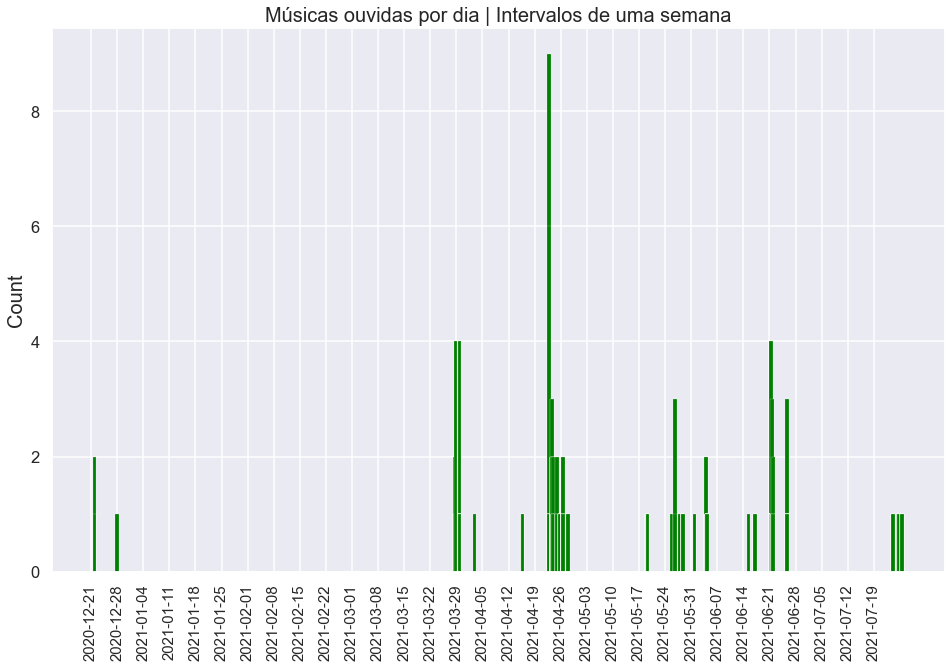

In [246]:
fig = plt.figure(figsize=(16,10))

# Músicas ouvidas por dia
x = df_history.groupby('endTime').size().index
y = df_history.groupby('endTime').size().values
xticks = pd.date_range(x[0],x[-1]).date[::7]
plt.bar(x,y, width=1, linewidth=0.2, color='green')
ax = plt.gca()

# Durante intervalos de uma semana
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 15)
ax.tick_params('x', rotation= 90)
ax.set_ylabel('Count', fontsize= 20)
ax.set_title('Músicas ouvidas por dia | Intervalos de uma semana', fontsize= 20)

plt.show()

## Os 20 artistas mais ouvidos

Text(0.5, 1.0, 'Minutos ouvidos por artista')

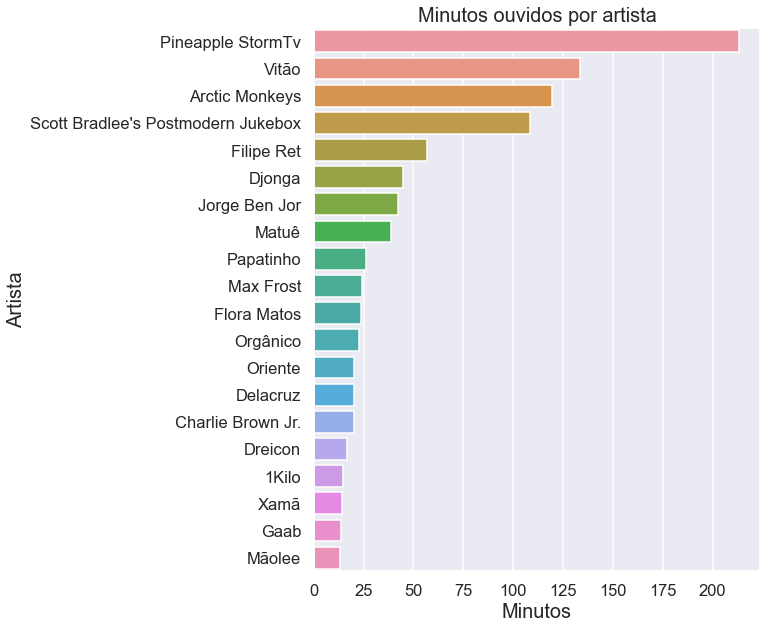

In [247]:
# Ignorando alertas de erros futuros
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

fig = plt.figure(figsize=(8,10))
ax = plt.subplot(111)
data = df_history.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values

sns.barplot(y, x, orient= "h", ax= ax)
ax.set_xlabel('Minutos', fontsize=20)
ax.set_ylabel('Artista', fontsize=20)
ax.set_title('Minutos ouvidos por artista', fontsize=20)

## As 20 faixas mais ouvidas

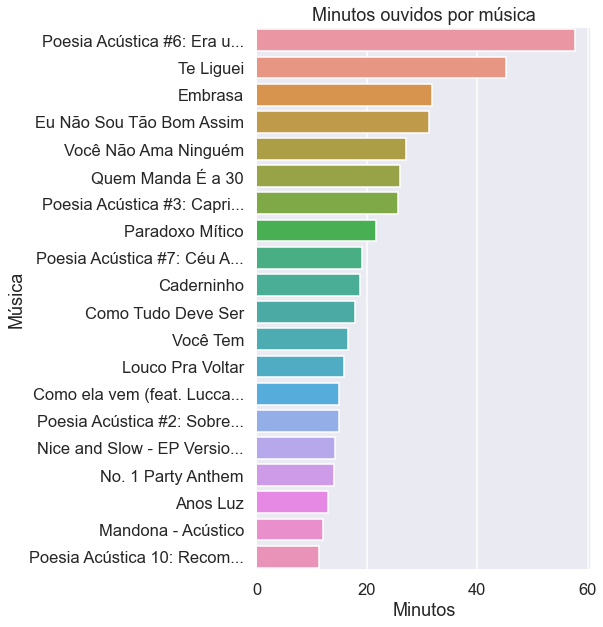

In [285]:
fig = plt.figure(figsize=(6,10))
ax = plt.subplot(111)
data = df_history.groupby('trackName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values

sns.barplot(y,x, orient="h", ax = ax)
ax.set_xlabel('Minutos')
ax.set_ylabel('Música')

# Diminuindo o rótulo do nome da música (para o caso de músicas com nome muito longo)
yticklabels = []

for label in ax.get_yticklabels():
    text = label.get_text()
    if len(text) > 25:
        yticklabels.append(text[:25] + '...')
    else:
        yticklabels.append(text)
ax.set_yticklabels(yticklabels)

plt.title('Minutos ouvidos por música')
plt.show()

## Frequência de escuta por hora do dia

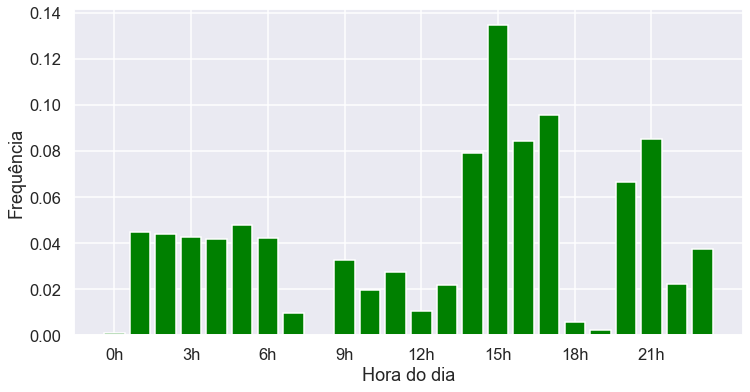

In [249]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('timeOfDay')['minPlayed'].sum()
x, y = data.index, data.values
plt.bar(x,y/y.sum(), color='green')

xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
plt.xticks(xticks[::3], xticklabels[::3])

plt.ylabel('Frequência')
plt.xlabel('Hora do dia')

plt.show()

## Frequência de escuta por dia da semana

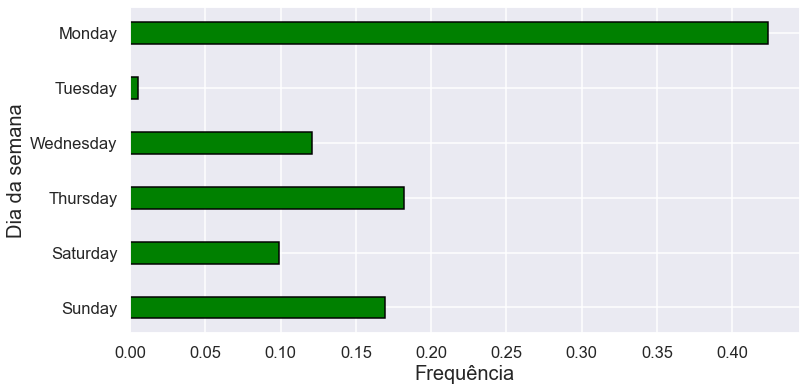

In [250]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('dayOfWeek')['minPlayed'].sum()
data = data[[1,5,6,4,2,3]][::-1]
x, y = data.index, data.values

plt.barh(x,y/y.sum(), height=0.4, color='green', edgecolor='black')
plt.xlabel('Frequência', fontsize= 20)
plt.ylabel('Dia da semana', fontsize= 20)

plt.show()

## Mapa de calor

Text(58.421875, 0.5, 'Dia da semana')

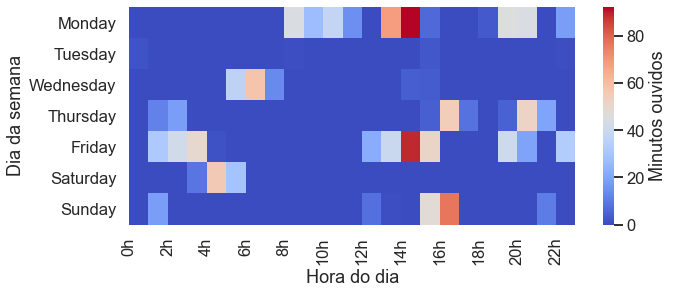

In [251]:
time_per_week = df_history.pivot_table(columns='timeOfDay', index='dayOfWeek', 
                                    values='minPlayed', aggfunc=np.sum).fillna(0)

# Os dias da semana foram embaralhados
time_per_week = time_per_week.iloc[[1,5,6,4,0,2,3],:]
fig = plt.figure(figsize=(10,4))
ax = sns.heatmap(time_per_week, cmap='coolwarm',
                 cbar_kws=dict(label='Minutos ouvidos'))

# Definindo detalhes como rótulos e orientação da imagem
xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
ax.set_xticks(xticks[::2])
ax.set_xticklabels(xticklabels[::2])
ax.tick_params('x',rotation=90)

ax.set_xlabel('Hora do dia')
ax.set_ylabel('Dia da semana')

## Nuvem de palavras

Criei duas wordclouds, uma com os nomes dos artistas e outra com os nomes das músicas.    
Os artistas com mais músicas tem mais visibilidade.     
Seguindo a mesma lógica, as músicas tocadas mais vezes aparecem em maior destaque.


In [252]:
# Percorrendo a variável artistName para armazenar na variável músicas
artistas = " ".join(s for s in df_history['artistName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(artistas)}")

Quantidade de Palavras: 6195


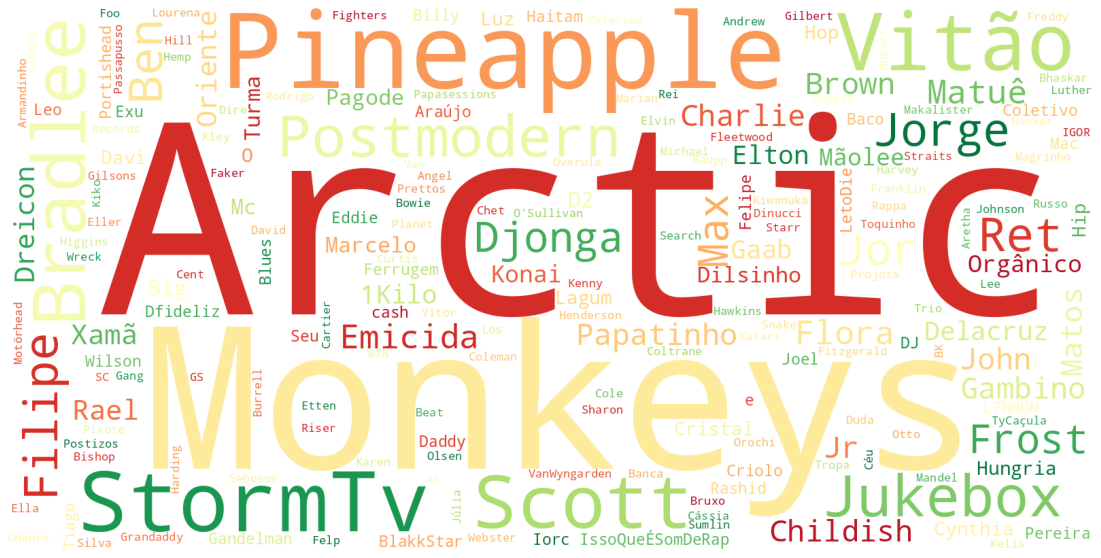

In [253]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800, random_state=1, colormap="RdYlGn", collocations=False).generate(artistas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("artistas_spotify2_michelle.png");

In [254]:
# Percorrendo a variável trackName para armazenar na variável músicas
musicas = " ".join(s for s in df_history['trackName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(musicas)}")

Quantidade de Palavras: 9289


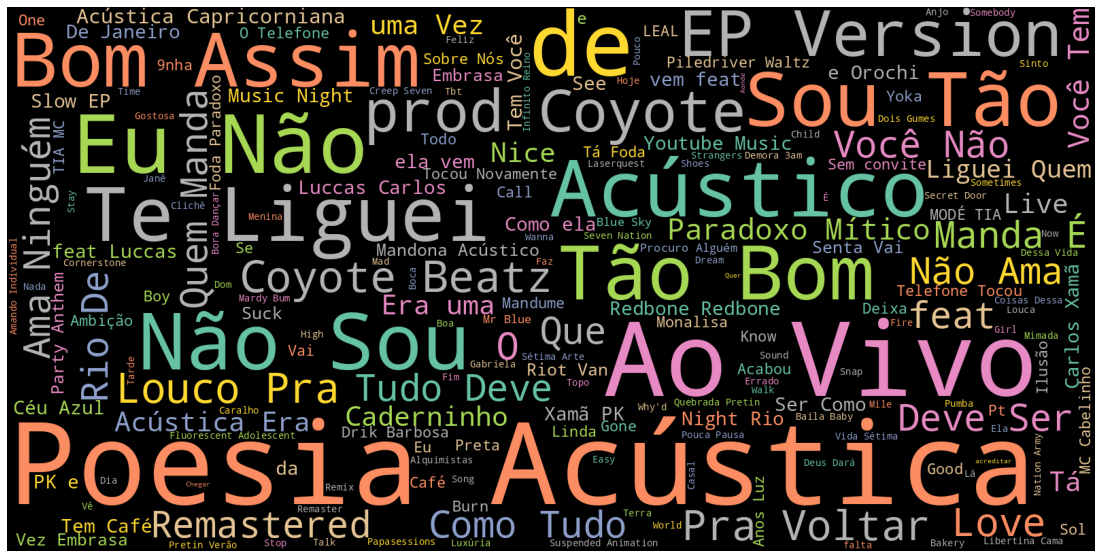

In [255]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, random_state=1, colormap="Set2").generate(musicas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("musicas_spotify_michelle.png");

## Salvando os DataFrames com dados tratados

In [256]:
# 01 - Salvando o histórico das músicas ouvidas
#df_history.to_csv('./dados_tratados/spotify_1/StreamingHistory.csv', index = None)

In [284]:
# 04 - Salvando os albuns curtidos
#df_albums.to_csv('./dados_tratados/spotify_1/albums.csv', index = None)

In [257]:
# 05 - Salvando os dados de busca 
#df_search.to_csv('./dados_tratados/spotify_1/SearchQueries.csv', index = None)

## Unindo os DataFrames com dados das 2 contas do Spotify

### Unificando o Histórico de Streaming das duas contas

In [258]:
import glob

In [259]:
sptfy_1_history = pd.read_csv('./dados_tratados/spotify_1/StreamingHistory.csv')

In [260]:
sptfy_1_history.head()

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2020-12-21 21:16:00,Ferrugem,Pra você acreditar - Ao vivo,3.398233,December,21,Monday,21,2020-12-21 00:00:00
1,2020-12-21 21:19:00,Turma do Pagode,Aonde Quer Chegar (feat. Gaab),3.194017,December,21,Monday,21,2020-12-21 00:00:00
2,2020-12-21 21:24:00,Dilsinho,Controle Remoto (Ao Vivo),3.950500,December,21,Monday,21,2020-12-21 00:00:00
3,2020-12-21 21:30:00,Ferrugem,Sinto sua falta - Ao vivo,3.411033,December,21,Monday,21,2020-12-21 00:00:00
4,2020-12-21 21:30:00,Turma do Pagode,Deixa em Off - Ao Vivo,0.253983,December,21,Monday,21,2020-12-21 00:00:00


In [261]:
sptfy_1_history.shape

(486, 9)

In [262]:
sptfy_2_history = pd.read_csv('./dados_tratados/spotify_2/StreamingHistory.csv')

In [263]:
sptfy_2_history.head()

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050,March,29,Monday,1,2021-03-29 00:00:00
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833,March,29,Monday,1,2021-03-29 00:00:00
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433,March,29,Monday,1,2021-03-29 00:00:00
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433,April,5,Monday,20,2021-04-05 00:00:00
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500,April,5,Monday,20,2021-04-05 00:00:00


In [264]:
sptfy_2_history.shape

(679, 9)

In [265]:
streaming_all_data = glob.glob('/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/streaming_completo/StreamingH*.csv')
print(streaming_all_data)

['/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/streaming_completo/StreamingHistory_2.csv', '/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/streaming_completo/StreamingHistory_1.csv']


In [266]:
lista_df = []

for data in streaming_all_data:
    df_streaming = pd.read_csv(data, sep=',', encoding='UTF-8')
    lista_df.append(df_streaming)

In [267]:
all_streamingHistory = pd.concat(lista_df, axis=0, ignore_index=True)
all_streamingHistory.shape

(1165, 9)

In [268]:
all_streamingHistory.head()

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050,March,29,Monday,1,2021-03-29 00:00:00
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833,March,29,Monday,1,2021-03-29 00:00:00
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433,March,29,Monday,1,2021-03-29 00:00:00
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433,April,5,Monday,20,2021-04-05 00:00:00
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500,April,5,Monday,20,2021-04-05 00:00:00


In [297]:
all_streamingHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     1165 non-null   object 
 1   artistName  1165 non-null   object 
 2   trackName   1165 non-null   object 
 3   minPlayed   1165 non-null   float64
 4   month       1165 non-null   object 
 5   dayOfMonth  1165 non-null   int64  
 6   dayOfWeek   1165 non-null   object 
 7   timeOfDay   1165 non-null   int64  
 8   date        1165 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 82.0+ KB


In [298]:
# Convertendo searchTime de strings para datetime
all_streamingHistory['endTime'] = pd.to_datetime(all_streamingHistory['endTime'])

all_streamingHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     1165 non-null   datetime64[ns]
 1   artistName  1165 non-null   object        
 2   trackName   1165 non-null   object        
 3   minPlayed   1165 non-null   float64       
 4   month       1165 non-null   object        
 5   dayOfMonth  1165 non-null   int64         
 6   dayOfWeek   1165 non-null   object        
 7   timeOfDay   1165 non-null   int64         
 8   date        1165 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 82.0+ KB


In [299]:
#all_streamingHistory.to_csv("./dados_tratados/spotify_completo/all_streamingHistory.csv", index = None)

### Unificando o Histórico de Pesquisas das duas contas

In [270]:
sptfy_1_search = pd.read_csv('./dados_tratados/spotify_1/SearchQueries.csv')

In [271]:
sptfy_1_search.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-08 14:33:01,melhores rap roma,['spotify:playlist:27yXXsKK8JBZiymoNnXHde']
1,ANDROID,2021-05-15 17:24:25,rael,['spotify:artist:0GWNKI3VPEcJsOIEhUjmxd']
2,ANDROID,2021-05-19 05:22:17,vit,['spotify:artist:06lnOkY99sXVW44Y0M4BDP']
3,ANDROID,2021-05-26 15:56:55,quando o gra,[]
4,ANDROID,2021-05-31 20:56:32,rap 2020,['spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8']


In [272]:
sptfy_1_search.shape

(42, 4)

In [273]:
sptfy_2_search = pd.read_csv('./dados_tratados/spotify_2/SearchQueries.csv')

In [274]:
sptfy_2_search.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"['spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8', 's..."
1,ANDROID,2021-05-01 17:42:15,low roar,['spotify:playlist:3NHJr2O6HVU1Dnywxogcyo']
2,ANDROID,2021-05-01 17:42:57,rap nacional,['spotify:playlist:07DFhdfMTy8VhvstdHqGEd']
3,ANDROID,2021-05-01 17:50:07,resistance,['spotify:playlist:27yXXsKK8JBZiymoNnXHde']
4,ANDROID,2021-05-02 14:19:27,london grammar,['spotify:playlist:37i9dQZF1DZ06evO0a532y']


In [275]:
sptfy_2_search.shape

(52, 4)

In [276]:
queries_all_data = glob.glob('/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/search_completo/Search*.csv')
print(queries_all_data)

['/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/search_completo/SearchQueries_2.csv', '/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/search_completo/SearchQueries_1.csv']


In [277]:
lista_df = []

for data in queries_all_data:
    df_search = pd.read_csv(data, sep=',', encoding='UTF-8')
    lista_df.append(df_search)

In [278]:
all_searchQueries = pd.concat(lista_df, axis=0, ignore_index=True)
all_searchQueries.shape

(94, 4)

In [279]:
all_searchQueries.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"['spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8', 's..."
1,ANDROID,2021-05-01 17:42:15,low roar,['spotify:playlist:3NHJr2O6HVU1Dnywxogcyo']
2,ANDROID,2021-05-01 17:42:57,rap nacional,['spotify:playlist:07DFhdfMTy8VhvstdHqGEd']
3,ANDROID,2021-05-01 17:50:07,resistance,['spotify:playlist:27yXXsKK8JBZiymoNnXHde']
4,ANDROID,2021-05-02 14:19:27,london grammar,['spotify:playlist:37i9dQZF1DZ06evO0a532y']


In [300]:
# Convertendo searchTime de strings para datetime
df_search['searchTime'] = pd.to_datetime(df_search['searchTime'])

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   platform               42 non-null     object        
 1   searchTime             42 non-null     datetime64[ns]
 2   searchQuery            42 non-null     object        
 3   searchInteractionURIs  42 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.4+ KB


In [301]:
#all_searchQueries.to_csv("./dados_tratados/spotify_completo/all_searchQueries.csv", index = None)

### Unificando os Albuns Curtidos das duas contas

In [286]:
sptfy_1_albums = pd.read_csv('./dados_tratados/spotify_1/albums.csv')

In [287]:
sptfy_1_albums.head()

,artist,album
0,Travis Scott,ASTROWORLD
1,Caetano Veloso,Multishow Ao Vivo Caetano e Maria Gadú
2,Rap Box,Cordel Marginal
3,Nick Murphy,Run Fast Sleep Naked
4,Cartola,Cartola


In [291]:
sptfy_1_albums.shape

(179, 2)

In [288]:
sptfy_2_albums = pd.read_csv('./dados_tratados/spotify_2/albums.csv')

In [289]:
sptfy_2_albums.head()

,artist,album
0,Norah Jones,Classic Jones
1,Criolo,Criolo E Emicida Ao Vivo
2,Johnny Cash,American III: Solitary Man
3,Black Sabbath,Heaven & Hell
4,Black Sabbath,Master of Reality


In [292]:
sptfy_2_albums.shape

(20, 2)

In [293]:
albums_all_data = glob.glob('/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/albums_completos/album*.csv')
print(albums_all_data)

['/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/albums_completos/albums_1.csv', '/home/mchll/my_project_dir/my_project_env/preparacao_projeto_5/dados_tratados/spotify_completo/albums_completos/albums_2.csv']


In [294]:
lista_df = []

for data in albums_all_data:
    df_albums = pd.read_csv(data, sep=',', encoding='UTF-8')
    lista_df.append(df_albums)

In [295]:
all_albums = pd.concat(lista_df, axis=0, ignore_index=True)
all_albums.shape

(199, 2)

In [296]:
#all_albums.to_csv("./dados_tratados/spotify_completo/all_albums.csv", index = None)

## Fim